<a href="https://colab.research.google.com/github/Nyawira12/KNN-and-Naive-Bayes-Classification/blob/main/Survival_Prediction_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SURVIVAL PREDICTION**

# 1. Defining the Question

## a) Specifying the Data Analytic Question

> We are tasked with applying the K-Nearest Neighbour (KNN) in determining whether or not passenegers on the titanic are likely to survive. 

## b) Defining the Metric for Success

- A high accuracy score of at least 80 %.
- The confusion matrix with prefrence for low number of false positives and false negatives. 

## c) Understanding the context 

The titanic was a British luxury shipthat sunk in the early hours of April 15th 1912. This analysis will use various passenger features to try and predict whether or not they could have survived. The following is a list of variables used in the analysis:

* PassengerId: Unique Id of a passenger
* Survived: Survival (0 = No; 1 = Yes)
* pclass: Ticket class (1 = 1st; 2 = 2nd; 3 = 3rd)     
* sex: Sex   
* Name: The name of the passenger  
* Age: Age in years     
* Sibsp: Number of siblings/Spouses aboard the Titanic     
* Parch: Number of parents/Children aboard the Titanic     
* Ticket: Ticket number     
* Fare: Passenger fare (British pound)   
* Cabin: Cabin number     
* Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## d) Recording the Experimental Design

1. Import libraries and load datasets. 
2. Reading the data.
3. Exploratory data analysis. 
4. Implementing the solution. 
5. Challenging the solution and conclusion

## e) Data Relevance

The data used is relevant as it contains information solely on the passengers that could be used in predictive analysis.

# 2. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from scipy import stats
import statistics as s
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data from the source i.e. csv
# ---
Train = pd.read_csv('/content/train (5).csv')
Test = pd.read_csv('/content/test (1).csv')

# 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
print('The shape of the train set is:', Train.shape)
print('\n')
print('The shape of the tests set is:', Test.shape)


The shape of the train set is: (891, 12)


The shape of the tests set is: (418, 11)


In [4]:
# Previewing the top of our dataset
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Previewing the bottom of our dataset
Train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
Test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


The datasets are identical, with the Train and Test sets being a sub-sets of the same overall dataset. The test set is however missing the survival column, we shall therefore use the train set to build our model. Its validity will depend on how accurate it is in carrying out predictions on the test set. 

In [8]:
# Checking whether each column has an appropriate datatype
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
Train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
Train.duplicated().sum()

0

In [13]:
Test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
Test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [16]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
Test.duplicated().sum()

0

# 4. External Data Source Validation

The titanic dataset is widely popular and available, as it is often used for research and educational purposes. 

# 5. Tidying the Dataset

In [18]:
#dropping columns we don't need
Train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
Test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

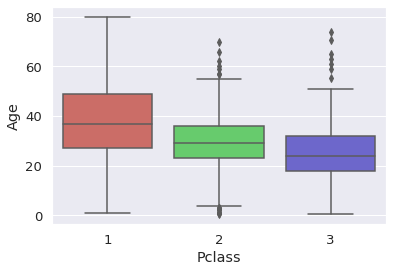

In [19]:
#we visualise the relationship between the passenger class and ages to
sns.boxplot(x='Pclass', y='Age', data=Train, palette='hls')

From the boxplot,we can see that the average ages for passengers in 1st class is approximately 37, 2nd class is approximately 30 and 3rd class is 24. We shall create a function to fill null values according to thes parameters. 

In [20]:
def age_approx(cols):
  Age = cols[0]
  Pclass = [1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass ==2:
      return 30
    else :
      return 24
   
  else:
     return Age

In [21]:
Train['Age'] = Train[['Age', 'Pclass']].apply(age_approx, axis=1)
Train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
Train_df = Train.dropna()
Train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

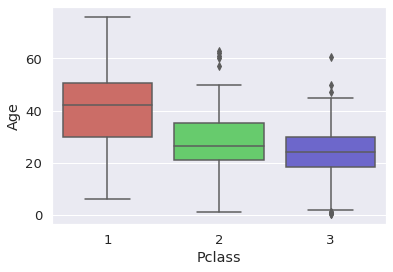

In [23]:
#we shall follow the same procedure with the test dataset. 
sns.boxplot(x='Pclass', y='Age', data=Test, palette='hls')

Just like the train set, more younger passengers seemed to be in 3rd class, with the average age of customers in 1st class being 42, 2nd class being 23 and 3rd class 22 years. We shall create a function that fills the null values according to these conditions. 

In [24]:
def age_approx(cols):
  Age = cols[0]
  Pclass = [1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 42
    elif Pclass ==2:
      return 23
    else :
      return 22
   
  else:
     return Age

In [25]:
Test['Age'] = Test[['Age', 'Pclass']].apply(age_approx, axis=1)
Test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [26]:
Test_df = Test.dropna()
Test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
cat_cols = ['Embarked', 'Sex']


# Using a for loop to change columns to their appriopriate datatypes
for column in Train_df.columns:
    if column in cat_cols:
      Train_df[column] = Train_df[column].astype('category').cat.codes


In [28]:
Train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
cat_cols = ['Embarked', 'Sex']


# Using a for loop to change columns to their appriopriate datatypes
for column in Test_df.columns:
    if column in cat_cols:
      Test_df[column] = Test_df[column].astype('category').cat.codes

In [30]:
Test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


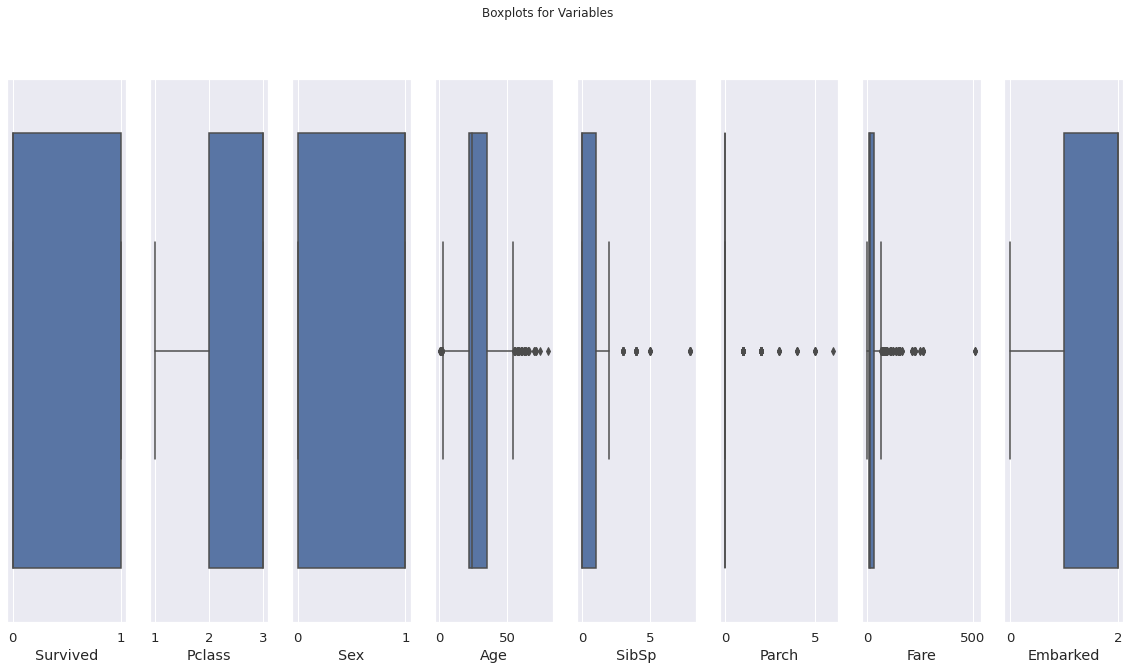

In [31]:
#We shall now examine existing outliers 

fig, ((ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8)) = plt.subplots(1,8, figsize=(20, 10))
fig.suptitle('Boxplots for Variables')
sns.boxplot(Train_df['Survived'], ax=ax1)
sns.boxplot(Train_df['Pclass'], ax=ax2)
sns.boxplot(Train_df['Sex'], ax=ax3)
sns.boxplot(Train_df['Age'], ax=ax4)
sns.boxplot(Train_df['SibSp'], ax=ax5)
sns.boxplot(Train_df['Parch'], ax=ax6)
sns.boxplot(Train_df['Fare'], ax=ax7)
sns.boxplot(Train_df['Embarked'], ax=ax8)
plt.show()

The numerical variables have some outliers, however given that they contain information on passengers, we shall not remove them from the dataset. 

# 6. Exploratory Analysis

## a) Univariate Analysis

In [32]:
Train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,28.518751,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.162820,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


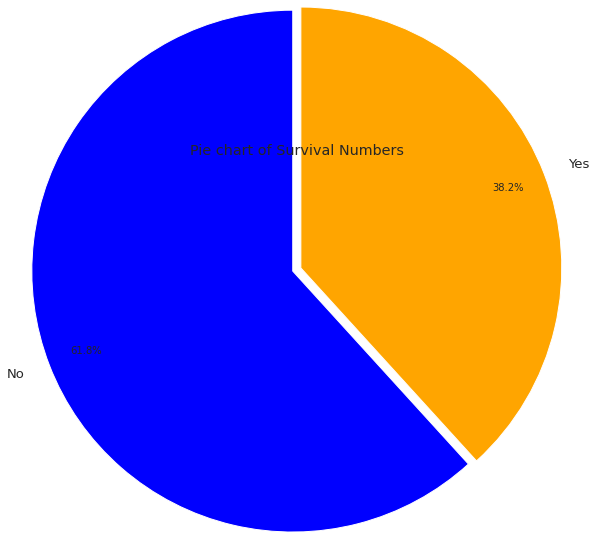

In [33]:
Pie = Train_df['Survived'].value_counts()


labels = ['No' , 'Yes']
colors = ['blue' , 'orange']
explode = [0.05, 0.05]


plt.pie(Pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 3)
plt.title('Pie chart of Survival Numbers')
plt.show()

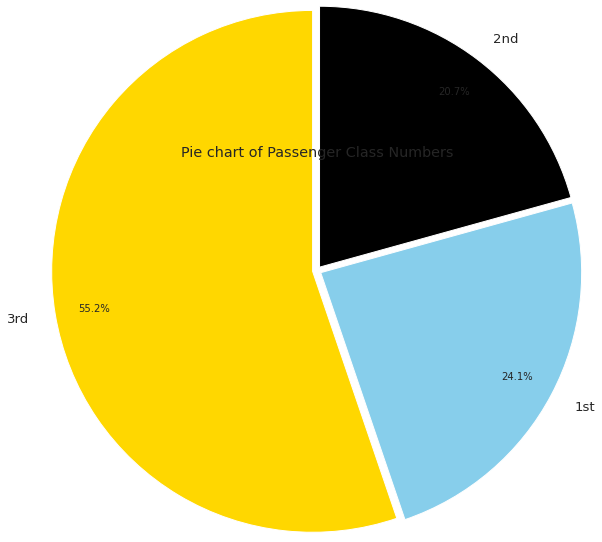

In [34]:
Pie = Train_df['Pclass'].value_counts()


labels = ['3rd', '1st', '2nd']
colors = ['gold', 'skyblue', 'black']
explode = [0.05, 0.05, 0.05]


plt.pie(Pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 3)
plt.title('Pie chart of Passenger Class Numbers')
plt.show()

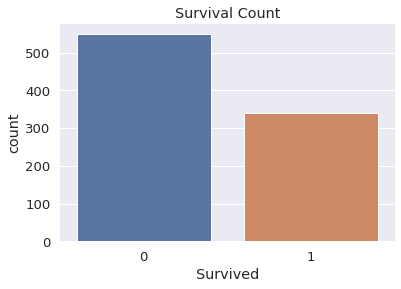

In [35]:
sns.countplot(x='Survived', data=Train_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Survival Count')
plt.show()

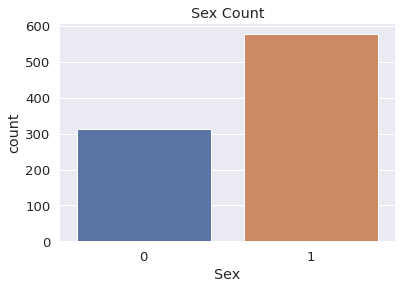

In [36]:
sns.countplot(x='Sex', data=Train_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Sex Count')
plt.show()

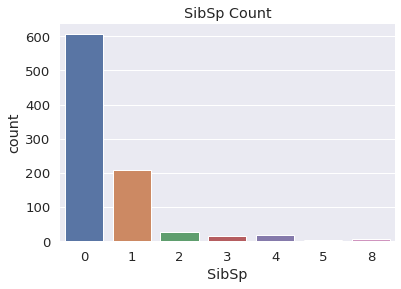

In [37]:
sns.countplot(x='SibSp', data=Train_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('SibSp Count')
plt.show()

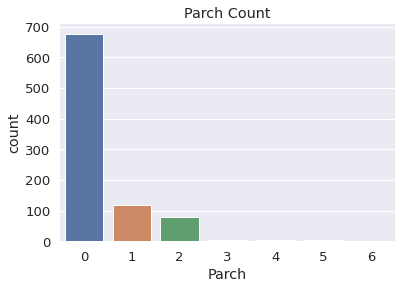

In [38]:
sns.countplot(x='Parch', data=Train_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Parch Count')
plt.show()

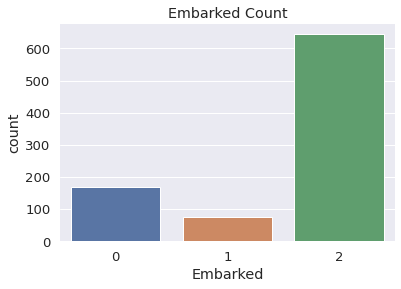

In [39]:
sns.countplot(x='Embarked', data=Train_df)
sns.despine(top=True, left=True, bottom=True, right=True)
plt.title('Embarked Count')
plt.show()

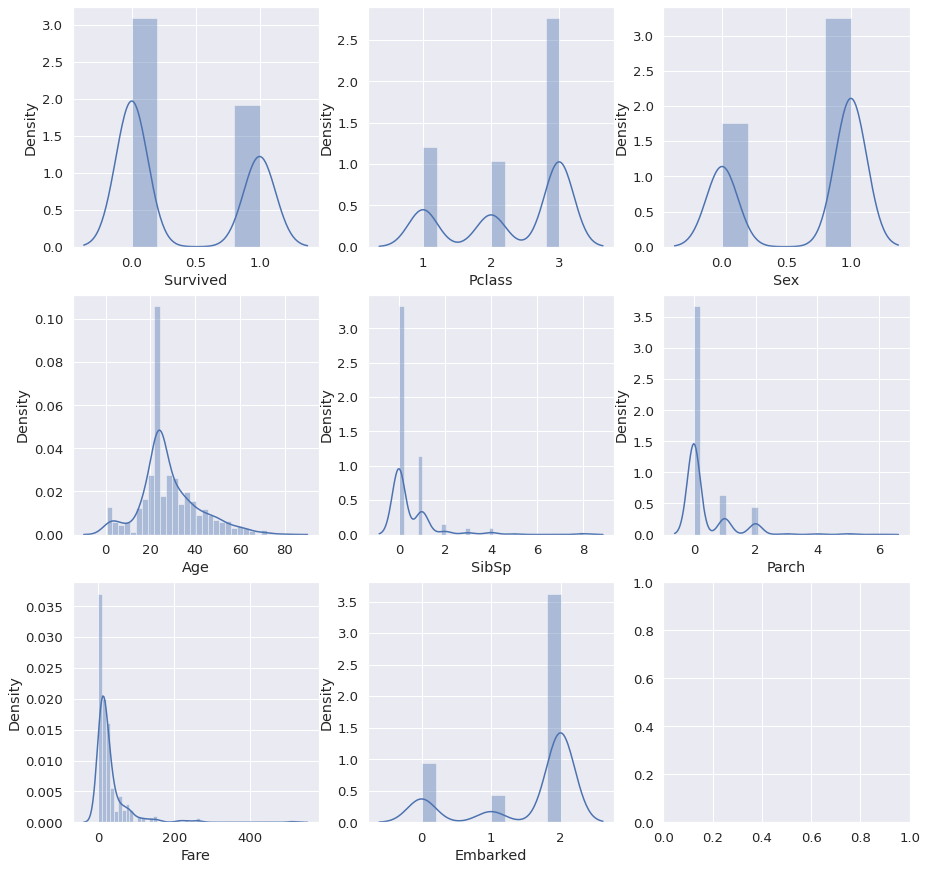

In [40]:
#plotting distribution plots for the variables

f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)
sns.distplot(Train_df['Survived'],ax=axes[0, 0])
sns.distplot(Train_df['Pclass'],ax=axes[0, 1])
sns.distplot(Train_df['Sex'],ax=axes[0, 2])
sns.distplot(Train_df['Age'],ax=axes[1, 0])
sns.distplot(Train_df['SibSp'],ax=axes[1, 1])
sns.distplot(Train_df['Parch'],ax=axes[1, 2])
sns.distplot(Train_df['Fare'],ax=axes[2, 0])
sns.distplot(Train_df['Embarked'],ax=axes[2, 1])

The univariate analysis reveals the following:

* Survived - The number of passengers who survived is lower than those who did not survive.
* Pclass - Most of the passengers were in 3rd class followed by 1st class then 2nd class had the least number of passengers.
* Sex - THere were more males than female passengers on booard the titanic.
* Age - Most of the passengers were aged between 20 and 40 with the majority being itheir late 20s
* SibSp - The majority number of siblings/spouses aboard was 0 therefore not many passengers had siblings /spouses on board.
* Parch - The majority number of parents/children aboard was also 0 implying not many passengers had parents and children on board.
* Fare - The majority of the fare paid by the passengers in British Pounds was between 0 and 100 with very few passengers paying more than 100.
* Embarked - The Southampton Port was the port where many passengers embarked followed by Cherbourg port and lastly the Queenstown port.

## b) Bivariate Analysis

In [41]:
corrMatrix = Train_df.corr()
corrMatrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.057833,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.352812,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.078802,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.057833,-0.352812,0.078802,1.000000,-0.231639,-0.154027,0.104553,-0.002171
SibSp,-0.034040,0.081656,-0.116348,-0.231639,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.154027,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.104553,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.002171,0.068900,0.040449,-0.226311,1.000000


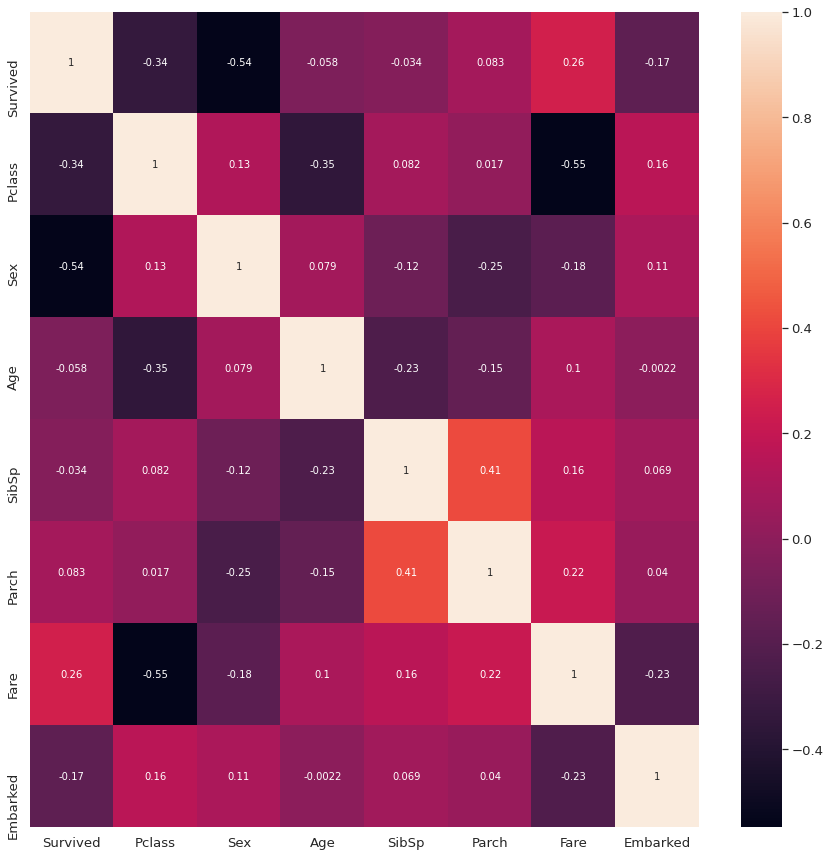

In [42]:
plt.figure(figsize=(15, 15))  
sns.heatmap(corrMatrix, annot = True)

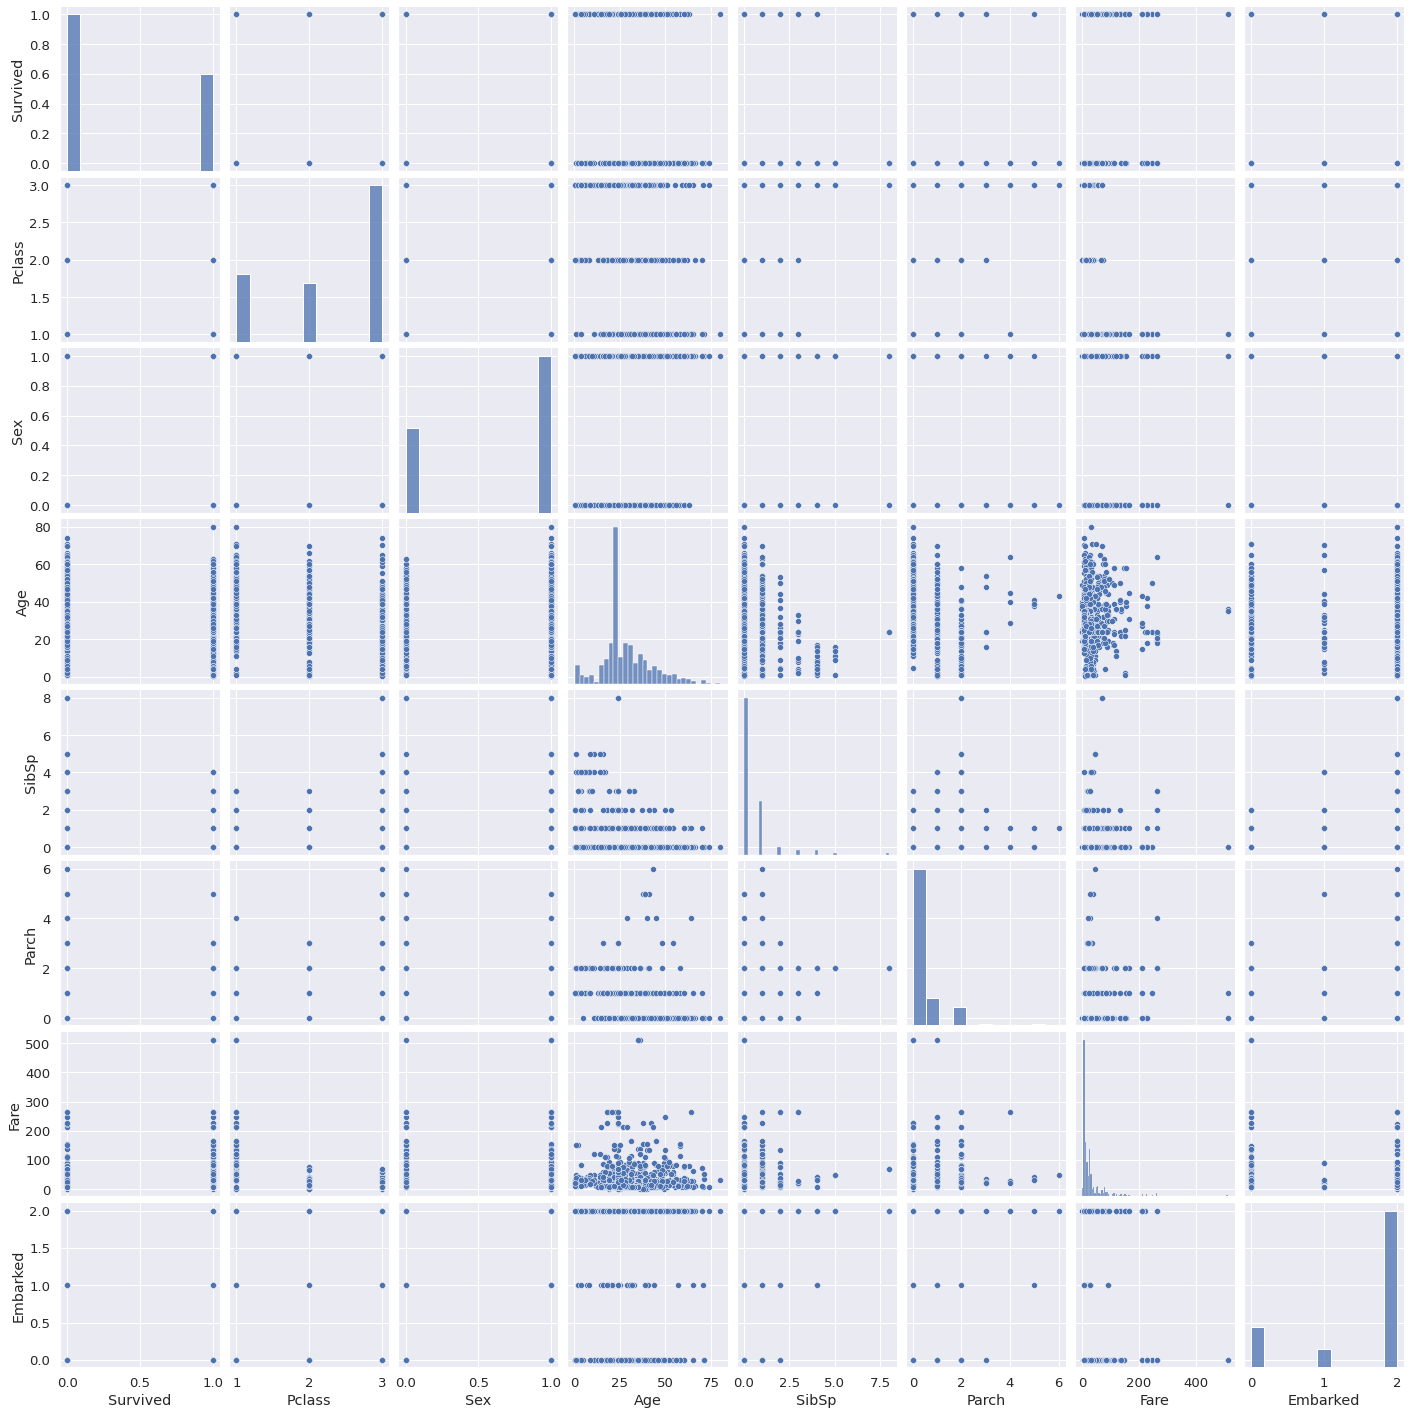

In [43]:
sns.pairplot(Train_df)
plt.show()

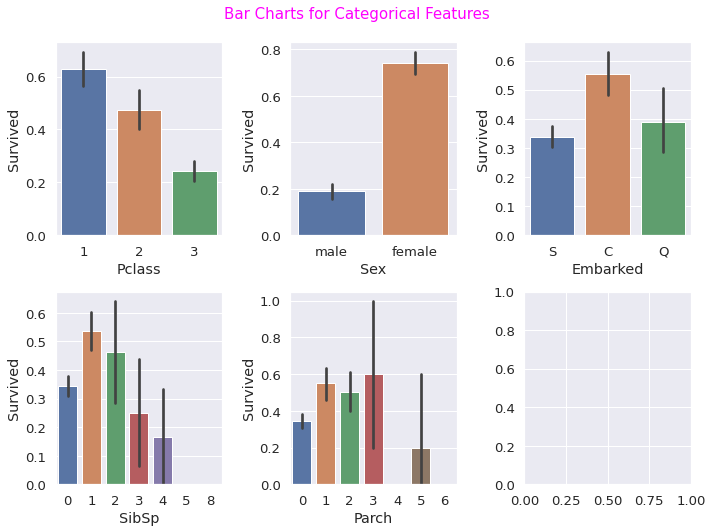

In [44]:
#Changing the datatype of the pclass to category so that we can work with it in visualizing 
Train['Pclass'] = Train['Pclass'].astype('category')
#Defining the categorical columns in our dataset
categorical_columns = Train[['Pclass','Sex','Embarked','SibSp','Parch']]

sns.set_style('darkgrid')    
# Ceating four subplots, in three rows and three columns                                         
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7))    
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

# Iterating through the subplots
for ax, data, name in zip(axes.flatten(), Train, categorical_columns):  
   # Creating a barchart in each subplot 
  sns.barplot(Train[name], Train.Survived, ax = ax)                   
 # Fitting the subplots to avoid overlapping  
plt.tight_layout() 

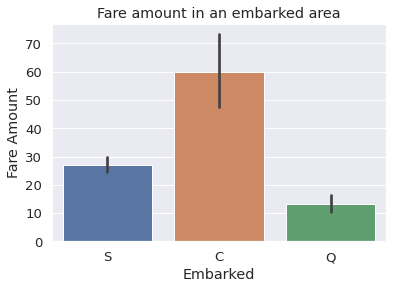

In [45]:
#Visualizing the fare amount per embarked area.

df = Train.groupby('Embarked').sum()
df = df.reset_index(inplace=True)

sns.barplot(x=Train['Embarked'], y=Train['Fare'], data=df)
plt.xlabel('Embarked')
plt.ylabel('Fare Amount')
plt.title('Fare amount in an embarked area')
plt.show()

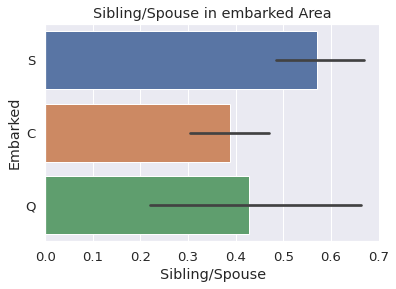

In [46]:
df1 = Train.groupby('Embarked').mean()
df1 = df1.reset_index(inplace=True)

sns.barplot(x=Train['SibSp'], y=Train['Embarked'], data=df1)
plt.xlabel('Sibling/Spouse')
plt.ylabel('Embarked')
plt.title('Sibling/Spouse in embarked Area')
plt.show()

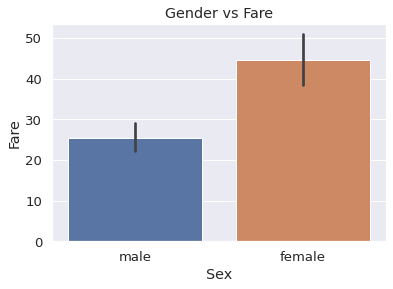

In [47]:
df = Train.groupby('Sex').sum()
df = df.reset_index(inplace=True)

sns.barplot(x=Train['Sex'], y=Train['Fare'], data=df)
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.title('Gender vs Fare')
plt.show()

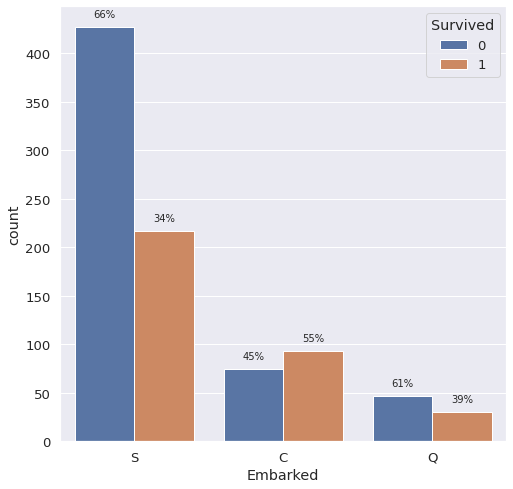

In [48]:
#Visualzing survival rate per embarked area.
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Embarked',data=Train,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
#Using a for loop to visualize the percentages for the right and left bar
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

Text(0.5, 1.0, 'People that did not Survive')

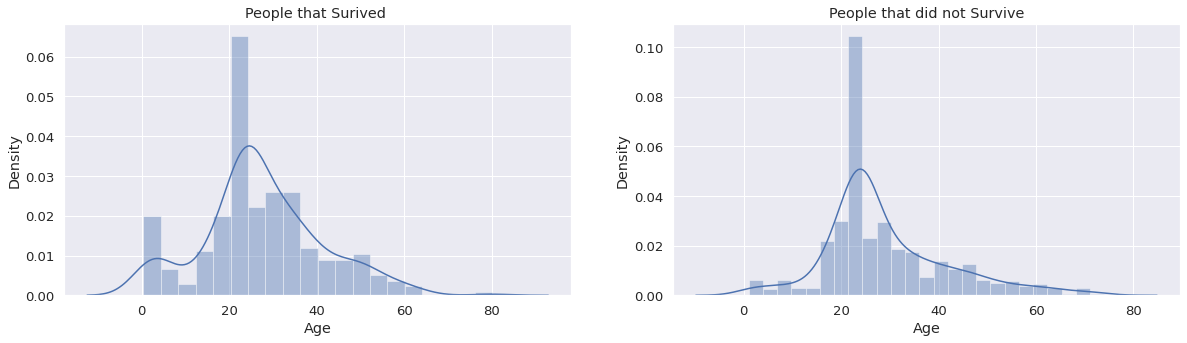

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_df[Train_df['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(Train_df[Train_df['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

Text(0.5, 1.0, 'People that did not Survive')

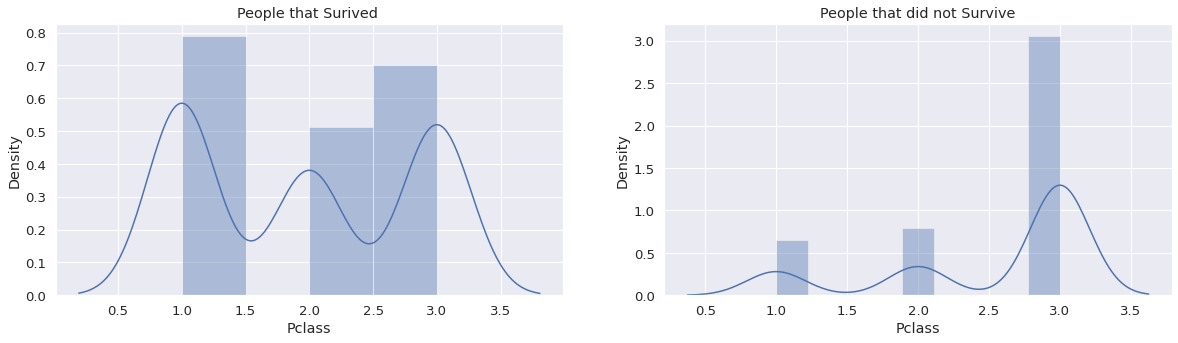

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_df[Train_df['Survived']==1].Pclass,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(Train_df[Train_df['Survived']==0].Pclass,ax=ax[1])
ax[1].set_title('People that did not Survive')

Text(0.5, 1.0, 'People that did not Survive')

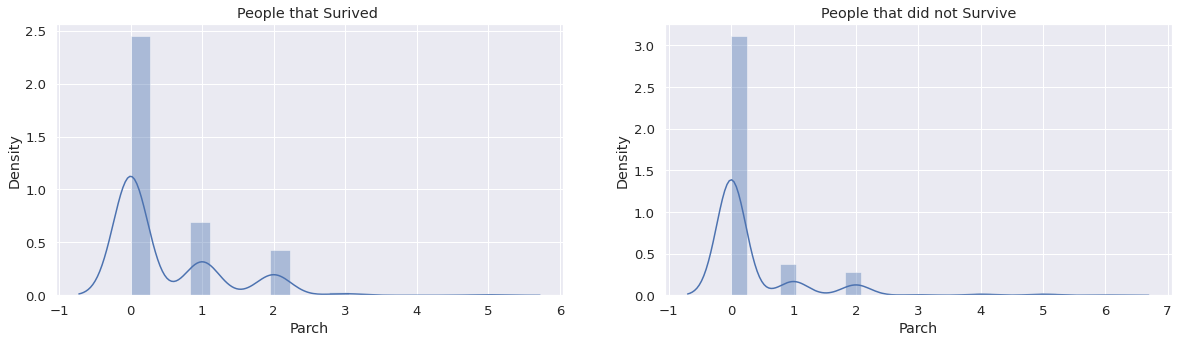

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_df[Train_df['Survived']==1].Parch,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(Train_df[Train_df['Survived']==0].Parch,ax=ax[1])
ax[1].set_title('People that did not Survive')

From the above we can deduce the following;
* Most of the people who survived were in 1st class followed by 2nd then 3rd class.
* The females survived more than the males.
* The passengers with 1 sibling/spouse survived the most followed by 2, 0, 3 then those with 4.
* The passengers with 3 parents/children survived the most followed by 1, 2,0 then 5.
* The passengers who embarked at Port Cherboug survived more than other ports.

The correlation between variables is relatively low which may limit the need for further feature reduction, this will however be confirmed using a multicolliniearity test. 
 

## c) Multivariate Analysis

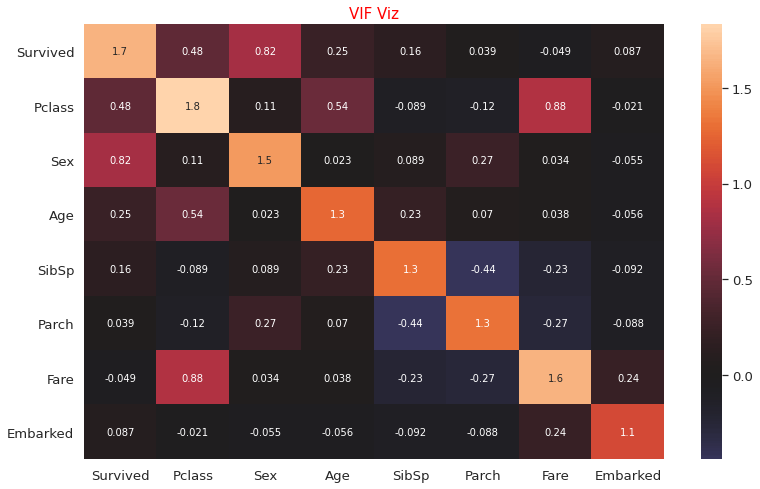

In [52]:
vif = pd.DataFrame(np.linalg.inv(corrMatrix.values),index=corrMatrix.index,columns=corrMatrix.columns)
plt.figure(figsize = (13, 8))
sns.heatmap(vif, annot = True, center = 0)
plt.title('VIF Viz', fontsize = 15, color = 'red')
plt.show()

We can see that there is low dependence between the variables and we shall use them all in the modelling process. 

In [53]:
#Defining the predictor variables and target variables in our dataset.
X = Train_df.drop(['Survived'],axis=1)
y = Train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# applying Linear Discriminant Analysis
# importing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
Fare,0.002177
Age,-0.050505
Parch,-0.087997
Embarked,-0.332661
SibSp,-0.361303
Pclass,-1.258571
Sex,-3.838118


The above dataframe displays the coefficients in descending order of contribution in predicting whether or not a passenger survived. 

# 7. Implementing the Solution

##a) Baseline Model

In [54]:
#Defining the predictor variables and target column
X = Train_df.drop(['Survived'],axis=1)
y = Train_df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#Fitting the data in a logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
#Predicting classification using the test set
y_predict = regressor.predict(X_test)
#Getting the metrics for assessing our baseline model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[84 21]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



The baseline model does not perform very well, we therefore expect that modelling will generate better results. 

## b) 80- 20 Split

In [55]:
X_train = Train_df.drop("Survived", axis=1)
Y_train = Train_df["Survived"]
X_test  = Test.dropna().copy()

X_train.shape, Y_train.shape, X_test.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
print('The accuracy score is:', accuracy_score(y_test,y_pred)*100)
print('\n')
print(classification_report(y_test, y_pred))

The accuracy score is: 70.2247191011236


              precision    recall  f1-score   support

           0       0.72      0.81      0.76       105
           1       0.67      0.55      0.60        73

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.70      0.70       178



The model perfroms slightly worse than the baseline, predicting a lower number of passengers that survived. 

Text(0, 0.5, 'Cross-validated accuracy')

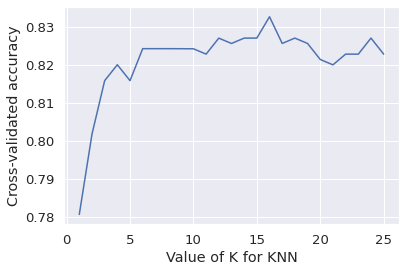

In [59]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
# It’s 5 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
  k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

The best value for k is revaled to be approximately 16 or 17 and is validated by the gris search results. 

In [60]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 16, 'weights': 'uniform'}


In [61]:
predicted = gd_sr.best_estimator_.predict(X_test)

print('The accuracy score is:', accuracy_score(y_test,predicted)*100)
print('\n')
print(classification_report(y_test, predicted))

The accuracy score is: 75.84269662921348


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       105
           1       0.77      0.59      0.67        73

    accuracy                           0.76       178
   macro avg       0.76      0.73      0.74       178
weighted avg       0.76      0.76      0.75       178



We can see that the perfromance is much better, with an accuracy score of 76% and 81 % of failed survivors and 67 % of survivors predicted accurately. 

## c) 70 - 30 Split

In [65]:
X_train = Train_df.drop("Survived", axis=1)
Y_train = Train_df["Survived"]
X_test  = Test.dropna().copy()

X_train.shape, Y_train.shape, X_test.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
print('The accuracy score is:', accuracy_score(y_test,y_pred)*100)
print('\n')
print(classification_report(y_test, y_pred))

The accuracy score is: 74.15730337078652


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       157
           1       0.72      0.62      0.66       110

    accuracy                           0.74       267
   macro avg       0.74      0.72      0.73       267
weighted avg       0.74      0.74      0.74       267



We can see that splitting at a ratio of 70-30 results in immediate improvement of preliminary model performance with a 74% accuracy score. We shall proceed to optimise the model for better results. 

Text(0, 0.5, 'Cross-validated accuracy')

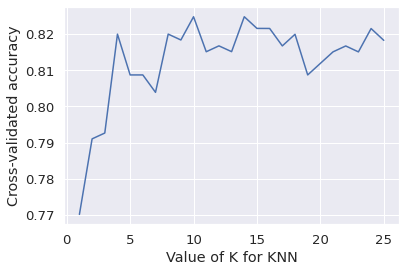

In [69]:
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
# It’s 5 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
  k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [71]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 10, 'weights': 'uniform'}


In [72]:
predicted = gd_sr.best_estimator_.predict(X_test)

print('The accuracy score is:', accuracy_score(y_test,predicted)*100)
print('\n')
print(classification_report(y_test, predicted))

The accuracy score is: 79.02621722846442


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.82      0.63      0.71       110

    accuracy                           0.79       267
   macro avg       0.80      0.77      0.77       267
weighted avg       0.79      0.79      0.78       267



Both cross validation and grid search show that a value of k=10 would generate the highest accuracy. we therefore input these parameters. The result is evidently better, with the accuracy score improving to 79 %. 

## d) 60 - 40 Split

In [77]:
X_train = Train_df.drop("Survived", axis=1)
Y_train = Train_df["Survived"]
X_test  = Test.dropna().copy()

X_train.shape, Y_train.shape, X_test.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
print('The accuracy score is:', accuracy_score(y_test,y_pred)*100)
print('\n')
print(classification_report(y_test, y_pred))

The accuracy score is: 76.96629213483146


              precision    recall  f1-score   support

           0       0.79      0.84      0.82       216
           1       0.73      0.66      0.69       140

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



Increasing the test size to 40% improved the model perfromance, as the accuracy score prior to optimisation has improved. 

Text(0, 0.5, 'Cross-validated accuracy')

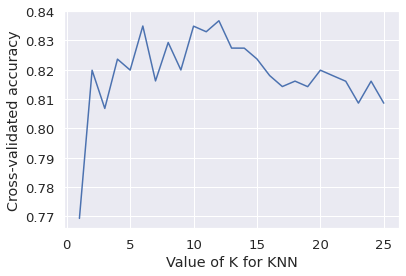

In [81]:
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
# It’s 5 fold cross validation with ‘accuracy’ scoring 
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
  k_scores.append(scores.mean())
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [82]:
# Perform grid search
# Specify the parameters
grid_param = {
    'n_neighbors': range(0,26),
    'weights': ['distance', 'uniform'],
}

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5)
# Fit the model
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)

{'n_neighbors': 12, 'weights': 'uniform'}


In [84]:
predicted = gd_sr.best_estimator_.predict(X_test)

print(accuracy_score(y_test,predicted)*100)
print('\n')
print(classification_report(y_test, predicted))

79.7752808988764


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       216
           1       0.81      0.63      0.71       140

    accuracy                           0.80       356
   macro avg       0.80      0.77      0.78       356
weighted avg       0.80      0.80      0.79       356



The grid search and cross validation exercises presented an optimal k value of 12. Inputting this into the training set improves model performance to meet the minimum threshold of an 80% accuracy score. 

# 8. Challenging the solution

> The models did not perform well, with increments in test sizes improving results, which implies that the unbalanced nature of the dataset significantly affects the accuracy of predictive analysis. We shall use another model, such as the random forest model which performs slightly worse than the previous. We can decipher that using KNN and increasing the test size samples, the model perfromance improves.






In [94]:
X_train = Train_df.drop("Survived", axis=1)
y_train = Train_df["Survived"]
X_test  = Test.dropna().copy()

X_train.shape, Y_train.shape, X_test.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.69

In [93]:
print(accuracy_score(y_test,Y_pred)*100)
print('\n')
print(classification_report(y_test, Y_pred))

78.65168539325843


              precision    recall  f1-score   support

           0       0.82      0.83      0.83       216
           1       0.74      0.71      0.72       140

    accuracy                           0.79       356
   macro avg       0.78      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356



# 9. Follow up questions

### a). Did we have the right data?

Yes we had the right data, however, the low scores suggests that additional preprocessing may be required. 

### b). Do we need other data to answer our question?

 No

### c). Did we have the right question?

Yes